<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/QUISPE_FLORES_JHON_RINALDO_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cargar las librerías necesarias para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Herramientas de Scikit-learn para preprocesamiento y división del dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Lectura de archivos CSV separados por comas
archivo1 = pd.read_csv('index_1.csv', delimiter=',')
archivo2 = pd.read_csv('index_2.csv', delimiter=',')

# Fusión de ambos archivos en un solo DataFrame
datos_completos = pd.concat([archivo1, archivo2], axis=0, ignore_index=True)

# Vista rápida del dataset combinado
print("Datos unificados:")
print(datos_completos.head())

# Listado de los nombres de columnas
print("\nEncabezados del dataset:", list(datos_completos.columns))

Datos unificados:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Encabezados del dataset: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']


In [5]:
# Asegurar una copia del DataFrame original
datos = datos_completos.copy()

# Intentar convertir la columna de fecha y hora al tipo datetime
datos['fecha_hora'] = pd.to_datetime(datos['datetime'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Quitar las filas donde no se pudo realizar la conversión
datos = datos[datos['fecha_hora'].notna()]


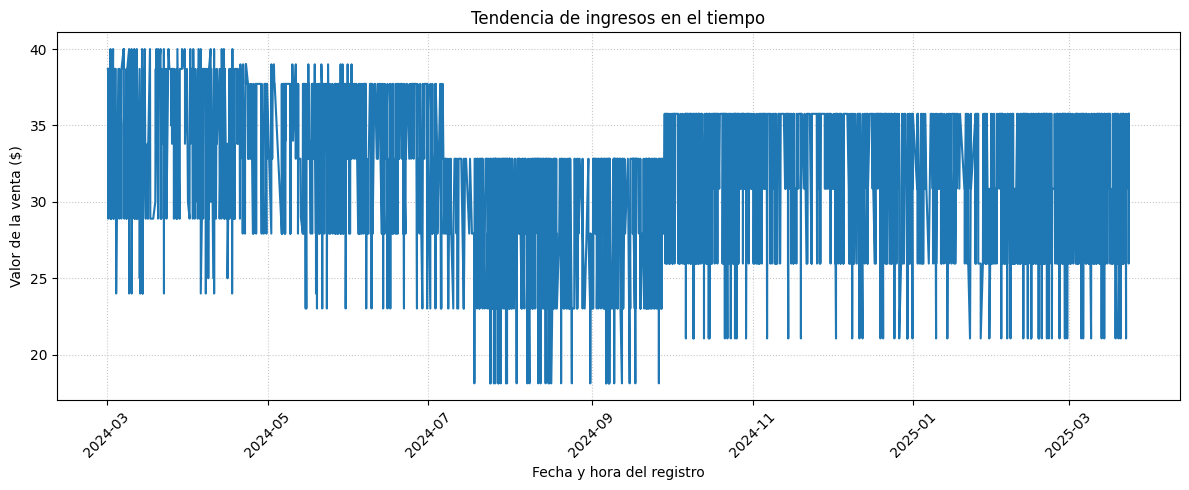

In [6]:
# Gráfico temporal de ingresos
plt.figure(figsize=(12, 5))

# Trazar línea de ingresos a lo largo del tiempo
sns.lineplot(x='fecha_hora', y='money', data=datos)

# Personalización de la gráfica
plt.title('Tendencia de ingresos en el tiempo')
plt.xlabel('Fecha y hora del registro')
plt.ylabel('Valor de la venta ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/tmp/ipython-input-7-771133683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='coffee_name', y='money', data=datos, palette='Set2')


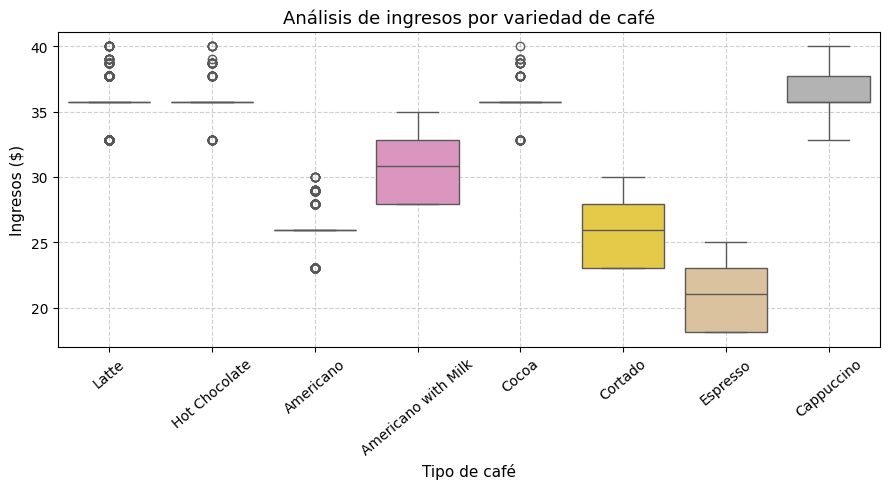

In [7]:
# Comparativa de ingresos según el tipo de café
plt.figure(figsize=(9, 5))

# Gráfico de caja para visualizar la dispersión de montos por café
sns.boxplot(x='coffee_name', y='money', data=datos, palette='Set2')

# Personalización del gráfico
plt.title('Análisis de ingresos por variedad de café', fontsize=13)
plt.xlabel('Tipo de café', fontsize=11)
plt.ylabel('Ingresos ($)', fontsize=11)
plt.xticks(rotation=40)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar la visualización
plt.show()


/tmp/ipython-input-8-958076660.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hora_del_dia', y='money', data=datos, estimator='mean', ci=None, color='teal')


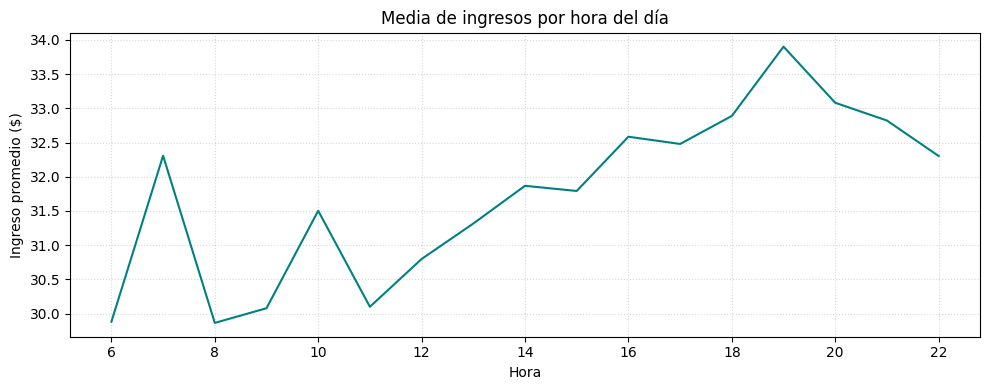

In [8]:
# Extraer información temporal para análisis por hora y día de la semana
datos['hora_del_dia'] = datos['fecha_hora'].dt.hour
datos['dia_laboral'] = datos['fecha_hora'].dt.dayofweek  # 0 es lunes

# Visualización: promedio de ingresos por hora
plt.figure(figsize=(10, 4))
sns.lineplot(x='hora_del_dia', y='money', data=datos, estimator='mean', ci=None, color='teal')

# Ajustes del gráfico
plt.title('Media de ingresos por hora del día')
plt.xlabel('Hora')
plt.ylabel('Ingreso promedio ($)')
plt.grid(visible=True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


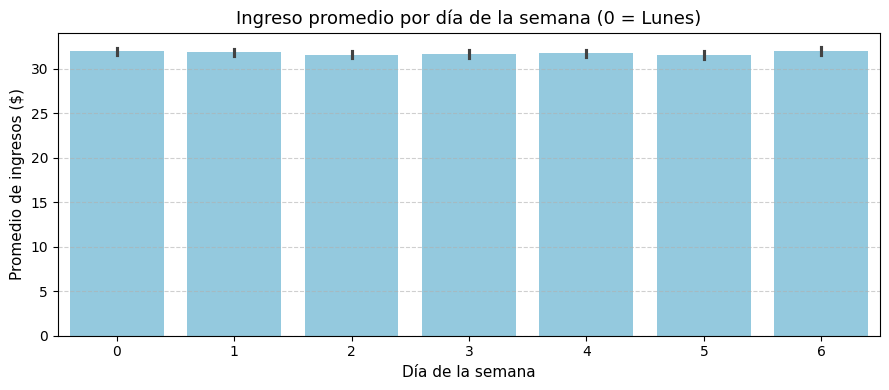

In [9]:
# Visualizar ingresos promedio según el día de la semana
plt.figure(figsize=(9, 4))

# Gráfico de barras: día de la semana vs ingreso medio
sns.barplot(x='dia_laboral', y='money', data=datos, estimator='mean', color='skyblue')

# Configuraciones del gráfico
plt.title('Ingreso promedio por día de la semana (0 = Lunes)', fontsize=13)
plt.xlabel('Día de la semana', fontsize=11)
plt.ylabel('Promedio de ingresos ($)', fontsize=11)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
# Crear columnas auxiliares para análisis temporal
datos['mes_num'] = datos['fecha_hora'].dt.month
datos['dia_sem'] = datos['fecha_hora'].dt.dayofweek  # Lunes = 0
datos['hora_registro'] = datos['fecha_hora'].dt.hour
datos['solo_fecha'] = datos['fecha_hora'].dt.date  # Para agrupación diaria

# Calcular ventas totales por día
ventas_por_dia = datos.groupby('solo_fecha')['money'].sum().reset_index()
ventas_por_dia.columns = ['solo_fecha', 'ventas_diarias']

# Fusionar la info diaria con el DataFrame original
datos = datos.merge(ventas_por_dia, on='solo_fecha')

# Codificación one-hot para la columna categórica del tipo de café
datos_codificados = pd.get_dummies(datos, columns=['coffee_name'], drop_first=True)

# Separar variables predictoras (X) y variable objetivo (y)
X = datos_codificados.drop(columns=['fecha_hora', 'solo_fecha', 'money', 'ventas_diarias'])
y = datos_codificados['ventas_diarias']

# Verificación de columnas del dataset final
print(datos_codificados.columns)


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'fecha_hora',
       'hora_del_dia', 'dia_laboral', 'mes_num', 'dia_sem', 'hora_registro',
       'solo_fecha', 'ventas_diarias', 'coffee_name_Americano with Milk',
       'coffee_name_Cappuccino', 'coffee_name_Cocoa', 'coffee_name_Cortado',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate',
       'coffee_name_Latte'],
      dtype='object')
